In [1]:
import numpy as np
from PIL import Image
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
PATH = '../input/all-dogs/all-dogs/'
CROPPED_IMAGES_DIR = '../input/cropped_images/images/'

NUM_CROPPED_IMAGES = 500000

In [4]:
# image_fn_list = os.listdir(CROPPED_IMAGES_DIR)
image_fn_list = os.listdir(PATH)

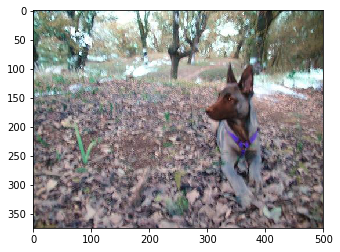

In [5]:
index = 102
resize_32 = (32,32)
resize_64 = (64,64)
image_full_path = PATH + image_fn_list[index]
img_orig = cv2.imread(image_full_path)
img_32 = cv2.resize(img_orig, resize_32)
img_64 = cv2.resize(img_orig, resize_64)
plt.imshow(img_orig)


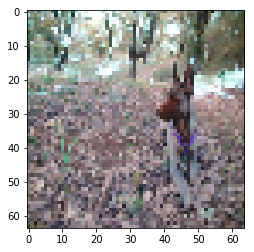

In [6]:
plt.imshow(img_64)


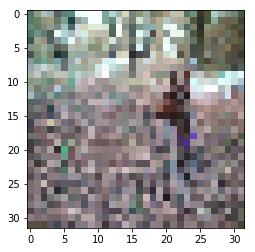

In [7]:
plt.imshow(img_32)


In [8]:
%%time
resize_32 = (32,32)
resize_64 = (64,64)
dataset=np.empty((0, 64, 64, 3))
len_list = len(image_fn_list)
for img_fn in tqdm(image_fn_list):
# for img_fn in image_fn_list:
    # print(f'Processing image {img_fn}')
    img_full_fn = os.path.join(PATH, img_fn)
    img_orig = cv2.imread(img_full_fn)
    img_64 = cv2.resize(img_orig, resize_64)
    img_64 = img_64.reshape(1,64,64,3)
    dataset = np.append(dataset, img_64, axis=0)

100%|██████████| 20579/20579 [1:23:43<00:00,  1.69it/s]

CPU times: user 4h 31min 33s, sys: 3h 45min 24s, total: 8h 16min 57s
Wall time: 1h 23min 43s


In [9]:
dataset.shape

(20579, 64, 64, 3)

In [10]:
np.save('orig_resize64.npy', dataset)